In [4]:
import numpy as np
import matplotlib.pyplot as plt

from particleloader import load

# Physics 
from physics_utils import get_angularity_4vec, get_WTA_axis, angle_between_3vec



In [6]:
events = np.load("Data/LEP_ee_dijets_hemisphere_1.npy")

In [18]:
from physics_utils import get_angularity_4vec, get_WTA_axis

WTA_axes = get_WTA_axis(events)
angularities = get_angularity_4vec(events, WTA_axes, beta = 1)

print(angularities)
plt.hist(angularities, density = True)

0.11402989397250718


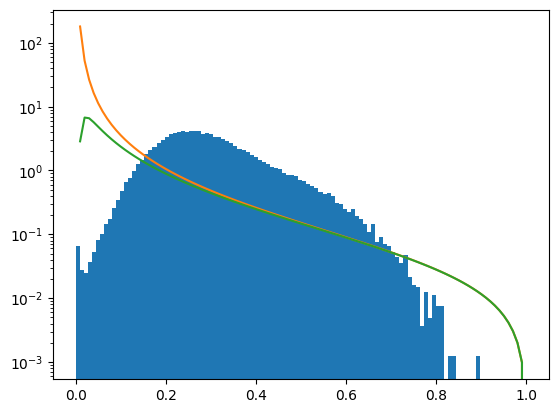

In [17]:
C_F = 4/3
m_Z = 91.1876


def alpha_s(scale):
    lambda_qcd = 0.2
    beta_0 = 11 - 2/3 * 3
    return 4 * np.pi / (beta_0 * np.log(scale**2 / lambda_qcd**2))


    
print(alpha_s(m_Z)) 



def LO_angularity(x, beta = 1):
    return alpha_s(m_Z * x)/(np.pi * beta) * C_F * np.log(1/x) / x

def LL_angularity(x, beta = 1):
    return alpha_s(m_Z * x)/(np.pi * beta) * C_F * np.log(1/x) / x * np.exp(-alpha_s(m_Z * x)/(2 * np.pi * beta) * C_F * np.log(1/x)**2)


xs = np.linspace(0.01, 1, 100)

plt.hist(angularities, bins = 100, density = True)
plt.plot(xs, LO_angularity(xs, beta = 1))
plt.plot(xs, LL_angularity(xs, beta = 1))


plt.yscale("log")

In [13]:
# from pyjet import cluster
# from tqdm import tqdm

# cache_dir = "~./ParticleLoader"
# lep_dijets = load("SPECTER_ee_dijets", 10000, cache_dir=cache_dir)

# def cluster_hemispheres(events):

#     jets = []
#     particles0 = np.zeros((events.shape[0], 500, 4))
#     particles1 = np.zeros((events.shape[0], 500, 4))
#     particles = [particles0, particles1]

#     for (e, event) in tqdm(enumerate(events)):

#         # Set up 4-vectors
#         four_vectors = []
#         for particle in event:

#             # Important that this is a list () and not a tuple []
#             four_vectors.append((particle[0], particle[1], particle[2], particle[3]))
            
#         four_vectors = np.array(four_vectors, dtype=[("E", "f8"), ("px", "f8"), ("py", "f8"), ("pz", "f8")])

#         # Cluster with kT (p = 1)

#         sequence = cluster(four_vectors, R=1, p=1, recomb_scheme = "WTA_modp_scheme", ep=True)
#         subjets = sequence.exclusive_jets(2)

#         hardest_jet = np.array((subjets[0].e, subjets[0].px, subjets[0].py, subjets[0].pz))
#         angles = angle_between_3vec(event[:,1:], hardest_jet[None, 1:])

#         above_pi_over_2 = (angles > np.pi/2) 
#         mask = event[:,0] > 0
#         particles0[e,~above_pi_over_2 * mask] = event[~above_pi_over_2 * mask]
#         particles1[e,above_pi_over_2 * mask] = event[above_pi_over_2 * mask]


#         # for i in range(2):

#         #     constituents = subjets[i].constituents_array(ep=True)
#         #     num_constituents = constituents.shape[0]
#         #     particles[i][e, :num_constituents] = [(c[0], c[1], c[2], c[3]) for c in constituents]


#     return particles

# particles = cluster_hemispheres(lep_dijets)

10000it [15:58, 10.43it/s]


NameError: name 'events' is not defined